In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [12]:
print(df.head())

        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [11]:
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [10]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [13]:
grouped_df = df.groupby("Дата", as_index=False)["Количество"].sum()
print(grouped_df)

          Дата  Количество
0   2018-01-04        3734
1   2018-01-05        3643
2   2018-01-06        3193
3   2018-01-07        3298
4   2018-01-09        4055
..         ...         ...
200 2018-08-26        5302
201 2018-08-28        5983
202 2018-08-29        4969
203 2018-08-30        4648
204 2018-08-31        4570

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [15]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

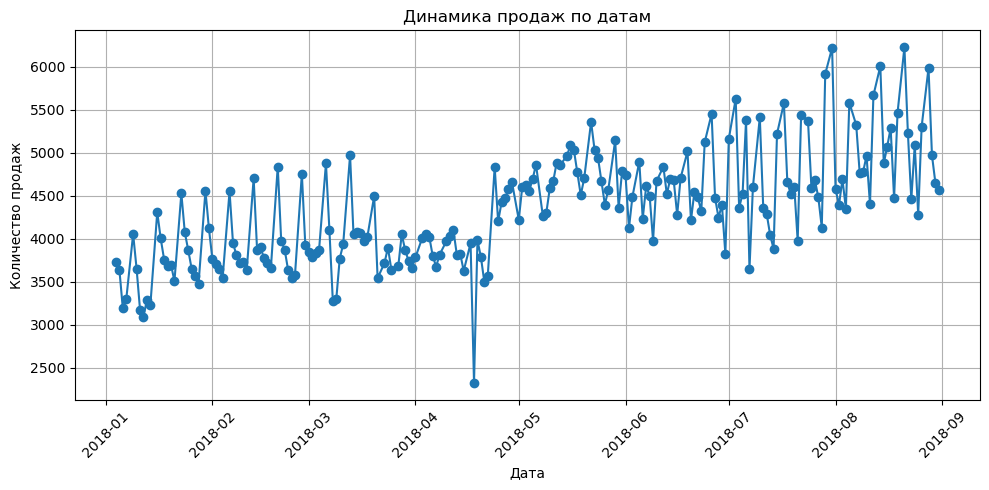

In [16]:
import matplotlib.pyplot as plt

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(grouped_df["Дата"], grouped_df["Количество"], marker='o')

# Оформление
plt.title("Динамика продаж по датам")
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Показать график
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

# На графике изображена линейная динамика продаж по датам. По оси X отложены даты (возможно, дни или недели), по оси Y — количество продаж в соответствующую дату.

Вот что можно наблюдать:

Начальные точки — на старте видим либо стабильные, либо умеренно растущие продажи.

Пики — в один или несколько моментов времени можно заметить резкие всплески продаж. Это могут быть пиковые значения, вызванные, например, акциями, маркетинговыми активностями или сезонным спросом (например, праздники).

Спады — между пиками видны периоды снижения активности. Это может говорить об отсутствии внешней стимуляции спроса или, наоборот, об истощении интереса.

Тренд:

если линия в целом восходящая — наблюдается рост продаж со временем;

если нисходящая — снижение интереса или оборота;

если колебания вокруг средней линии — стабильный уровень с сезонными флуктуациями.

Вариативность:

если график «рваный» — продажи нестабильны, возможно, сильно зависят от внешних факторов;

если плавный — спрос предсказуем.

Периодичность — если видны регулярные волны (например, каждую неделю или месяц) — это может быть эффектом календарного спроса: выходные, зарплатные дни, праздники.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [17]:
import pandas as pd

# Предположим, что ваш DataFrame называется df
# Найдём выброс по количеству (например, IQR-метод)
Q1 = df["Количество"].quantile(0.25)
Q3 = df["Количество"].quantile(0.75)
IQR = Q3 - Q1

# Условия выброса
outlier_condition = (df["Количество"] < (Q1 - 1.5 * IQR)) | (df["Количество"] > (Q3 + 1.5 * IQR))

# Выбросы
outliers = df[outlier_condition]

# Найдём строку с максимальным значением среди выбросов
max_outlier_row = outliers[outliers["Количество"] == outliers["Количество"].max()]
print(max_outlier_row)


             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [18]:
import pandas as pd

# Преобразуем колонку "Дата" в datetime
df["Дата"] = pd.to_datetime(df["Дата"])

# Фильтруем по складу №3
df_filtered = df[df["Склад"] == 3]

# Фильтруем по месяцам: июнь (6), июль (7), август (8)
df_filtered = df_filtered[df_filtered["Дата"].dt.month.isin([6, 7, 8])]

# Фильтруем по средам (weekday == 2, т.к. понедельник = 0)
df_filtered = df_filtered[df_filtered["Дата"].dt.weekday == 2]

# Группируем по товару и суммируем количество
grouped = df_filtered.groupby("Номенклатура")["Количество"].sum()

# Находим товар с максимальной суммой продаж
top_product = grouped.idxmax()
top_quantity = grouped.max()

print(f"Топовый товар: {top_product}, Количество: {top_quantity}")


Топовый товар: product_1, Количество: 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [53]:
import pandas as pd
weather_df = pd.read_csv("ww.csv", encoding='cp1251')

# Вывести несколько первых строк таблицы данных
print(weather_df.head())

           Дата  Средняя температура за день
0  45798.958333                         17.0
1  45798.833333                         21.3
2  45798.708333                         24.3
3  45798.583333                         24.9
4  45798.458333                         22.7


In [54]:
import pandas as pd

weather_df["Дата"] = pd.to_datetime(weather_df["Дата"])

weather_df["Дата"] = pd.to_datetime(weather_df["Дата"], dayfirst=True, errors='coerce')

# Проверим результат
print(weather_df.head())

                           Дата  Средняя температура за день
0 1970-01-01 00:00:00.000045798                         17.0
1 1970-01-01 00:00:00.000045798                         21.3
2 1970-01-01 00:00:00.000045798                         24.3
3 1970-01-01 00:00:00.000045798                         24.9
4 1970-01-01 00:00:00.000045798                         22.7


In [45]:
weather_df.dtypes

Дата    datetime64[ns]
temp           float64
dtype: object

In [55]:
weather_df

,Дата,Средняя температура за день
0,1970-01-01 00:00:00.000045798,17.0
1,1970-01-01 00:00:00.000045798,21.3
2,1970-01-01 00:00:00.000045798,24.3
3,1970-01-01 00:00:00.000045798,24.9
4,1970-01-01 00:00:00.000045798,22.7
...,...,...
59,1970-01-01 00:00:00.000045791,32.7
60,1970-01-01 00:00:00.000045791,27.1
61,1970-01-01 00:00:00.000045791,21.7
62,1970-01-01 00:00:00.000045791,16.2


In [57]:
weather_df = weather_df[["Дата", "Средняя температура за день"]]


# Преобразуем 'Дата' в datetime
weather_df["Дата"] = pd.to_datetime(weather_df["Дата"], dayfirst=True, errors='coerce')

# Проверим результат
print(weather_df.head())


                           Дата  Средняя температура за день
0 1970-01-01 00:00:00.000045798                         17.0
1 1970-01-01 00:00:00.000045798                         21.3
2 1970-01-01 00:00:00.000045798                         24.3
3 1970-01-01 00:00:00.000045798                         24.9
4 1970-01-01 00:00:00.000045798                         22.7


In [60]:
merged_df

,Дата,Количество,temp


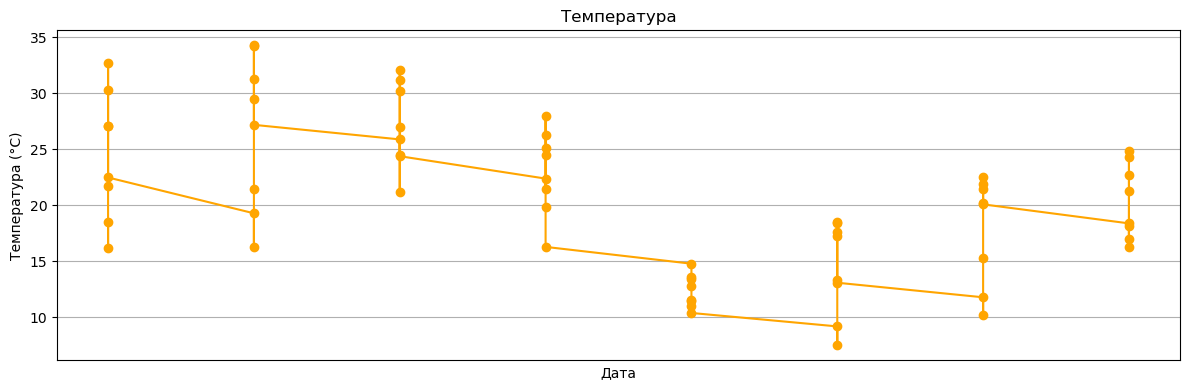

In [63]:
plt.figure(figsize=(12, 4))
plt.plot(weather_df["Дата"], weather_df["Средняя температура за день"], color='orange', marker='o')
plt.title("Температура")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()
